In [54]:
%matplotlib inline  

import matplotlib

import os 
import sys
sys.path.append('/root/share')
from ohmyyeast import datasets


In [20]:
data = datasets.reduced()

In [21]:
data.head()

,AID,e2,e3,e4,e5,e6,e7,e8,e9,e10,...,K_FC,Afus1,kd,ks,At,Bt,Ct,E,F,fVal
0,1,0,0,0,1,0,0,1,0,0,...,999.48,0.6931,1,0.4019,60.23,38.9,363.59,1,1,1018.90
1,1,0,0,0,1,0,0,1,0,0,...,576.26,0.6931,1,0.4019,60.23,38.9,363.59,1,1,822.60
2,1,0,0,0,1,0,0,1,0,0,...,986.12,0.6931,1,0.4019,60.23,38.9,363.59,1,1,913.48
3,1,0,0,0,1,0,0,1,0,0,...,998.57,0.6931,1,0.4019,60.23,38.9,363.59,1,1,794.64
4,1,0,0,0,1,0,0,1,0,0,...,963.20,0.6931,1,0.4019,60.23,38.9,363.59,1,1,927.29


In [22]:
data.columns

Index(['AID', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'S',
       'k_SA', 'K_SA', 'k_BA', 'K_BA', 'ki_BA', 'Ki_BA', 'k_CA', 'K_CA',
       'ki_CA', 'Ki_CA', 'k_AA', 'K_AA', 'ki_AA', 'Ki_AA', 'k_AB', 'K_AB',
       'ki_AB', 'Ki_AB', 'k_CB', 'K_CB', 'ki_CB', 'Ki_CB', 'k_BB', 'K_BB',
       'ki_BB', 'Ki_BB', 'k_BC', 'K_BC', 'ki_BC', 'Ki_BC', 'k_AC', 'K_AC',
       'ki_AC', 'Ki_AC', 'k_CC', 'K_CC', 'ki_CC', 'Ki_CC', 'ki_EA', 'Ki_EA',
       'ki_EB', 'Ki_EB', 'ki_EC', 'Ki_EC', 'k_FA', 'K_FA', 'k_FB', 'K_FB',
       'k_FC', 'K_FC', 'Afus1', 'kd', 'ks', 'At', 'Bt', 'Ct', 'E', 'F',
       'fVal'],
      dtype='object')

In [34]:
res = data.groupby('AID')['fVal'].agg(['mean','std'])

In [36]:
res.head()

,mean,std
AID,,
1,999.103,282.536473
2,2743.940,153.699282
3,623.188,53.906848
4,1072.739,797.463973
5,2702.920,207.066505


In [43]:
res2 = res.sort_values('mean').reset_index()

In [44]:
res2.head()

,AID,mean,std
0,591,512.188,39.380353
1,627,519.903,59.462769
2,573,522.502,57.137642
3,645,534.823,61.436156
4,1464,543.735,25.881715


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


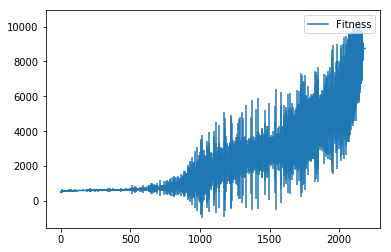

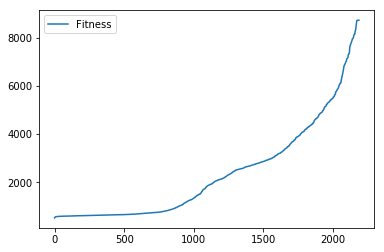

In [63]:
res3 = res2.rename(columns={'mean':'Fitness'})
res3.plot(y=['Fitness'],yerr='std')
res3.plot(y=['Fitness'])